# 3. Canopy Height Models

An integral part of any analysis is the production of a canopy height model, or CHM. The CHM is a rasterized representation of the canopy of the forest. The creation and filtering of CHMs play a large role in tree detection algorithms and are an interpretable way to display information.

In [5]:
import pyfor
import matplotlib.pyplot as plt

# This line increases the figure size in Jupyter
plt.rcParams['figure.figsize'] = [8, 8]

Let's retrieve some data to play with. We will use the same test file as previous notebooks, but trim things down to a manageable area using the `filter` method.

In [6]:
# Load in and subset the test data.
pc = pyfor.cloud.Cloud("../data/test.las")
pc.normalize(0.5)
pc.filter(min = 405000, max = 405000+200, dim="x")
pc.filter(min = 3276300, max = 3276300+200, dim="y")

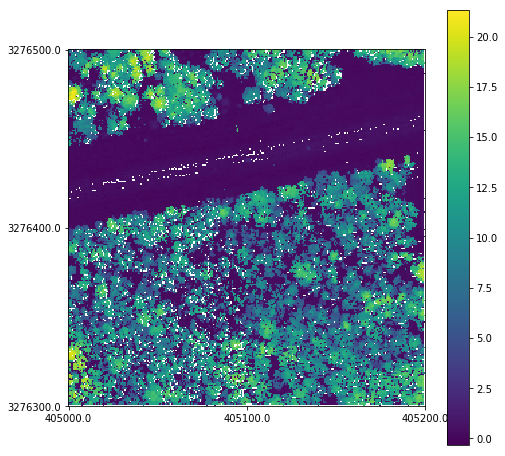

In [7]:
pc.plot(cell_size = 0.75)

The plot method of a given Cloud object is actually a basic canopy height model, where each raster cell is represented as the maximum Z value in that cell. There is an obvious problem here: the NA values present in the CHM, and the presence of "pits", areas of the raster that  incorrectly represent the elevation of the CHM due to points penetrating the canopy.

To dig deeper, we will construct a canopy height model using the `Cloud` object's `chm` method. This returns a `Raster` object that has methods and attributes helpful for manipulating CHMs. It also includes a keyword argument `interp_method` that allows us to set one of three interpolation options to fill in these missing values.

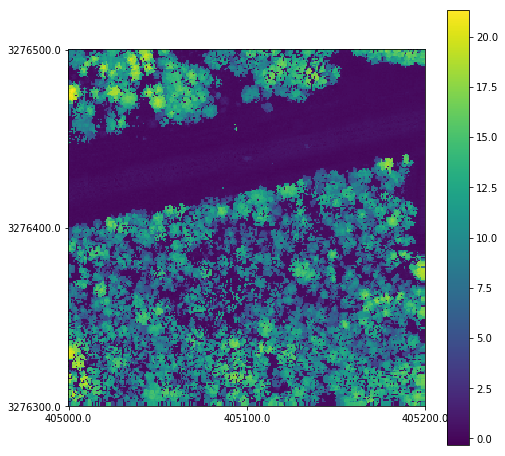

In [8]:
chm = pc.chm(cell_size = 0.75, interp_method = "nearest")
chm.plot()

Pretty good, but what about those pits? pyfor has an implementation of a median filter useful for dealing with pits. This can be accessed as another option in the `chm` method using the `pit_filter` keyword argument.

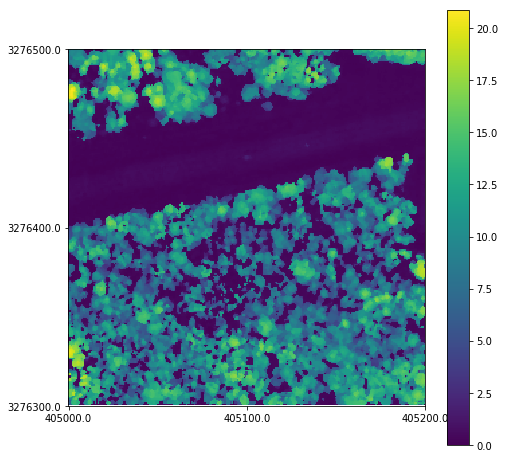

In [9]:
chm = pc.chm(cell_size = 0.75, interp_method = "nearest", pit_filter = "median", kernel_size = 3)
chm.plot()

If we are satisfied with our work we can save our CHM. Because the CHM is just a `Raster` object it has all of the same components. We just need to make sure to add CRS information to the source point cloud to finish things off.

In [25]:
import pyproj

# Set point cloud projection
pc.crs = pyproj.Proj('+init=epsg:26910').srs

# Write the chm to a raster
chm.write("chm.tif")